In [1]:
import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

# Coin Flip Experiment
Stephen Iota <br>
EE 503 Probability: problem set 2, question 8 <br>
07 September 2021 <br>

## Problem 8.

Use `random.uniform()` to generate output [Heads, Tails] of a coin flip experiment.
    
    (a) Estimate the probability of heads in a fair coin flip by generating a lot of instances of experiment.
    
    (b) Estimate the probability of heads in a biased coin flip with bias of 0.8, and find the number of heads and tails in a random experiment.
    
    (c) Plot/Display estimate as a function of number of experiments (n) and argue how do you decide how many times you need to repeat the experiment to get a good estimate.

In [3]:
random = default_rng()

### Part (a)

We use a `random.uniform` to sample values from the interval $[0,1)$. To model the fair coin, we say any values greater than or equal to 0.5 is equivalent to flipping heads, and any values less than 0.5 are tails.

In [4]:
n_flips = 100_000
p_fair = 0.5

fair_coin_flips = random.uniform(low=0, high=1, size=n_flips)  # NOTE: high value is not inclusive
fair_coin_estimate = sum(fair_coin_flips >= p_fair) / n_flips

print(f'Estimated probability of heads in a fair coin flip: {fair_coin_estimate:0.3f}')

Estimated probability of heads in a fair coin flip: 0.499


### Part (b)

To model the biased coin, we say all sampled values greater than or equal to 0.2 is equivalent to flipping heads, and the rest are considered tails. 

In [5]:
n_flips = 100_000
p_bias = 1 - 0.8

fair_coin_flips = random.uniform(low=0, high=1, size=n_flips)  # NOTE: high value is not inclusive
n_heads = sum(fair_coin_flips >= p_bias)

print(f'Out of {n_flips} random experiments, we flipped {n_heads} heads and {n_flips - n_heads} tails.')
print(f'This yields roughly a {100*n_heads/n_flips:0.2f} % chance of rolling heads with the biased coin.')

Out of 100000 random experiments, we flipped 80057 heads and 19943 tails.
This yields roughly a 80.06 % chance of rolling heads with the biased coin.


### Part (c)

We'll now run the experiment many different times for different values of $n$, to understand how increasing experiment size can help us gain confidence in our estimate.

In [6]:
n_values = [i for i in range(100, 250_000, 5_000)]
bias_coinflip_experiment = {}

for n in n_values:
    experiment = random.uniform(size=n)
    bias_coinflip_experiment[f'n_heads/{n}_tosses'] = sum(i >= p_bias for i in experiment)/n

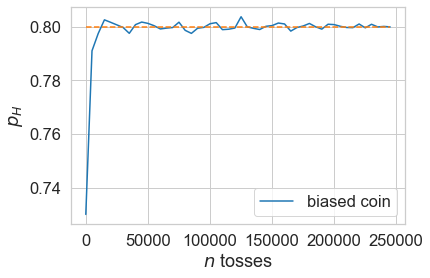

In [7]:
sns.lineplot(x=n_values, 
             y=bias_coinflip_experiment.values(),
             label='biased coin')
sns.lineplot(x=n_values,
             y=[0.8 for i in n_values],
             linestyle='--')

plt.xlabel(r'$n$ tosses')
plt.ylabel(r'$p_H$')
plt.legend()
plt.show()

We argue that we get a good-enough estimate of $p_H$ when the plot above becomes ''smooth enought'' and starts to converge to a small interval of values. In this case, it appears that after 150,000 tosses $p_H$ converges to roughly 0.8.